# Introduction to Artificial Neural Networks

## The Perceptron

In [4]:
# Imports required packages

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [ ]:
# Loads iris dataset
iris = load_iris(as_frame=True)

In [10]:
# Function load_iris function returns a bunch of objects containing data, target, 
# target names, description and feature names. The following shows the dataset object

display(iris.data)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
# and the following lists the target against each flower instance.
display(iris.target)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [52]:
# Prints the flower species that each instance either belongs to
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [22]:
# Creates Perceptron classifier instance and the model gets fitted on the four features of the
# dataset. The trained model will then can be used to predict any new iris species.

per_clf = Perceptron(random_state=42)
per_clf.fit(iris.data, iris.target)

Perceptron(random_state=42)

In [36]:
# Seperates flowers species wise

setosa = iris.data[iris.target == 0]
versicolor = iris.data[iris.target == 1]
virginica = iris.data[iris.target == 2]

In [86]:
# Now, check if the model can predict iris setosa
per_clf.predict(setosa)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0])

In [84]:
# Similarly, model predicts iris versicolor,
per_clf.predict(versicolor)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [72]:
# and the model predicts iris virginica
per_clf.predict(virginica)

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

It is observed from the above predictions is that model perfomance is better in predicting iris setosa and iris versilor than in predicting virginica.

## The Multilayer Perceptron (MLP) with Scikit-Learn

### Regression MLP

In [168]:
# Imports required packages
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [107]:
# Loads Californial housing dataset. May take few seconds to download 
# if the data is not already cached locally

housing = fetch_california_housing(as_frame=True)

In [103]:
# Checks the shape of the dataset
print(housing.data.shape)

(20640, 8)


In [117]:
# Checks the features of the housing dataset
display(housing.data)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [119]:
# Checks the target of the housing dataset
display(housing.target)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [129]:
# Splits the dataset into train and test dataset
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, test_size=0.25, random_state=42)

In [135]:
# Checks the shape of the full train dataset
X_train_full.shape

(15480, 8)

In [131]:
# Splits train dataset further to seperate 25% instances to be used as validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42)

In [139]:
# Checks the shape of the train and validation dataset
print("Shape of the train dataset: ", X_train.shape, 
      "\nShape of the validation dataset:", X_val.shape)

Shape of the train dataset:  (11610, 8) 
Shape of the validation dataset: (3870, 8)


In [143]:
# Creates MLP regressor instance and the model gets trained on the training dataset
mlp_reg = MLPRegressor(
    hidden_layer_sizes=[50, 50, 50], activation="relu", random_state=42)


In [147]:
# But before training, the data needs to be standardised
standard_scaler = StandardScaler()
X_trained_sclaled = standard_scaler.fit_transform(X_train)

In [155]:
# Shows few of the scaled instances
print(X_trained_sclaled[:5])

[[-0.19397883 -1.07781319 -0.94338545  0.01485314  0.02073335 -0.57291624
   0.92926047 -1.42215523]
 [ 0.75198318 -1.868895    0.40547793 -0.23327682  1.8614649   0.20516532
  -0.91654738  1.09666969]
 [-0.41469108  0.02970134  0.81808819  1.05678372 -0.08786707 -0.29983271
   1.30872858 -1.697027  ]
 [ 1.71889557 -1.31513773  0.32664379 -0.2195511  -0.33792183 -0.11146632
  -0.98213446  0.94174197]
 [-0.96207212 -1.23602955 -0.05625791 -0.031244    1.70905926 -0.30256989
  -0.80411238  1.32656244]]


In [157]:
# Now, the model gets trained with the scaled train dataset
# Note that the training make take several minutes to complete

mlp_reg.fit(X_trained_sclaled, y_train)

MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)

In [160]:
# Let's now check the model performance on the validation data

# Like train dataset, the validation data also gets scaled first, and
X_val_scaled = standard_scaler.transform(X_val)

# then model performs prediction on these instances
predictions_val = mlp_reg.predict(X_val_scaled)

In [166]:
# Shows few of predictions on validation instances
print(predictions_val[:10])

[1.28463736 2.3567012  1.37453837 2.02070033 3.10107312 1.81135689
 2.06033509 2.49663661 0.88914495 5.33612461]


In [170]:
# Now, metric Root Mean Squared Error (RMSE) is used to measure the model performance on validation data
rmse_val = mean_squared_error(y_val, predictions_val, squared=False)
print(rmse_val)

0.5053326657966256


### Classification MLP

The following experiment will continue on iris dataset to address multiclass classification problem. This time MLP will be used instead of Perceptron used in early experiment.

In [217]:
# Imports required packages
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [181]:
# Splits the dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42, stratify=iris.target)

In [207]:
# But before training, the data needs to be standardised
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)

In [209]:
# Creates MLP classifier instance and the model gets trained on the training dataset

mlp_clf = MLPClassifier(
    hidden_layer_sizes=[5], activation="relu", max_iter=2000, random_state=42)

mlp_clf.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=[5], max_iter=2000, random_state=42)

In [211]:
# Let's now check the model performance on the test data

# Like train dataset, the test data also gets scaled first, and
X_test_scaled = standard_scaler.transform(X_test)

# then model performs prediction on these instances
predictions_test = mlp_clf.predict(X_test_scaled)

In [219]:
# Now, metric accuracy is used to measure the model performance on test data
print(accuracy_score(y_test, predictions_test))

0.9666666666666667


It was noticed that MLP performed much better than the Perceptron classifier.

## The MLP with Keras

### Classification MLP With Keras Sequential API

In [40]:
# Imports required packages

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pathlib import Path
from time import strftime

In [239]:
# Loads fashion mnist dataset
fashion = fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 0us/step


In [247]:
# Considering dataset is organized in tuple, items are referenced as follows
(X_train_full, y_train_full), (X_test, y_test) = fashion

In [267]:
# Each training and test example is assigned to one of the following labels.
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", \
               "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [249]:
# Checks the shape of the datasets
print("Train dataset shape:", X_train_full.shape,
      "\nTest dataset shape:", X_test.shape)

Train dataset shape: (60000, 28, 28) 
Test dataset shape: (10000, 28, 28)


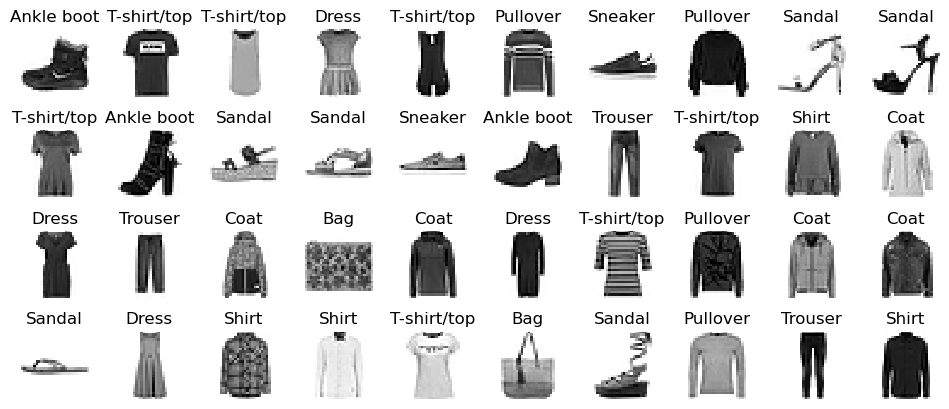

In [269]:
# Visualizes the dataset by plotting few images

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train_full[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train_full[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [255]:
# Splits train dataset further to seperate 5000 instances to be used as validation set

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=5000, random_state=42, stratify=y_train_full)

In [275]:
# Checks how image pixel intensities are represented in the dataset
print(X_train.dtype)

uint8


In [287]:
# Pixel intensities are observed to be represented as integers
# Now, shows minimum and maximum values in an image
print("Min. value:", X_train[0].min(), ", Max. value:", X_train[0].max())

Min. value: 0 , Max. value: 255


In [289]:
# Pixel intensities are hence scaled down to range 0 to 1 for all instances
X_train, X_val, X_test = X_train/255.0, X_val/255.0, X_test/255.0

**Modeling with Sequential API**

In [294]:
# Random seed for TensorFlow is set to reproduce the following model
tf.random.set_seed(42)

# Creates an empty model
model = tf.keras.Sequential()

# All layers are added to the model sequentially

model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())    # Flattens 2D image into 1D
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

2024-08-18 22:31:24.136479: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [296]:
# Prints the summary of the network
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [304]:
# Compiles the model with specified loss function, optimizer and oen or more metrics
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [306]:
# Trains and evalutes the model

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.7280 - accuracy: 0.7575 - val_loss: 0.4942 - val_accuracy: 0.8282
Epoch 2/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.4864 - accuracy: 0.8315 - val_loss: 0.4209 - val_accuracy: 0.8568
Epoch 3/30
1719/1719 [==============================] - 17s 10ms/step - loss: 0.4411 - accuracy: 0.8441 - val_loss: 0.3941 - val_accuracy: 0.8692
Epoch 4/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4128 - accuracy: 0.8550 - val_loss: 0.3767 - val_accuracy: 0.8722
Epoch 5/30
1719/1719 [==============================] - 18s 11ms/step - loss: 0.3944 - accuracy: 0.8613 - val_loss: 0.3850 - val_accuracy: 0.8600
Epoch 6/30
1719/1719 [==============================] - 17s 10ms/step - loss: 0.3787 - accuracy: 0.8651 - val_loss: 0.3561 - val_accuracy: 0.8730
Epoch 7/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3658 - accuracy: 0.8706 - val_loss: 0.3412 - val

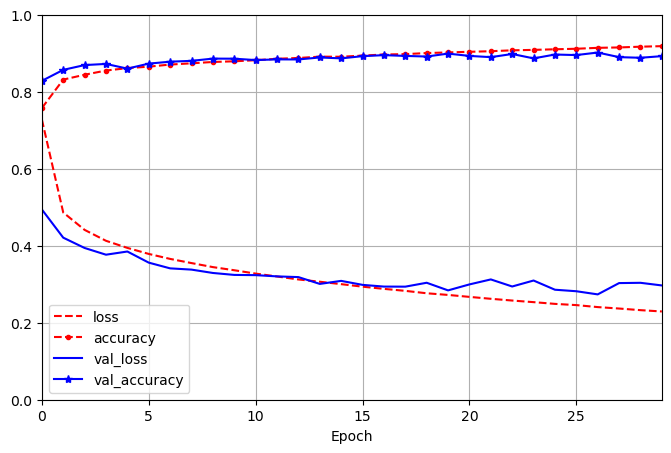

In [322]:
# Plots the learning curve

pd.DataFrame(history.history).plot(
    figsize=(8,5), grid=True, style=["r--", "r--.", "b-", "b-*"], xlabel="Epoch", xlim=[0, 29], ylim=[0, 1])
plt.show()

In [324]:
# Now, metric accuracy is used to measure the model performance on test data
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3541 - accuracy: 0.8741


[0.35405978560447693, 0.8741000294685364]

In [332]:
# Let's the model predict on test instances
predictions_proba_test = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [334]:
# Rounds off the per-class probability to two decimal places
predictions_proba_test.round(2)

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.97, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.03, 0.  , 0.  , ..., 0.  , 0.96, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [336]:
# Extracts the final predictions from the probability distribution
predictions_test = predictions_proba_test.argmax(axis=1)

In [342]:
# prints class of the first three predicted items from the test dataset
np.array(class_names)[predictions_test[:3]]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [344]:
# Now, check the actual class names for these three items from the testing dataset
np.array(class_names)[y_test[:3]]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

It was seen that the classifier actually classified all three images correctly.

### Regression MLP With Keras Sequential API

In [42]:
# Loads Californial housing dataset.
housing = fetch_california_housing(as_frame=True)

In [44]:
# Splits the dataset into train and test dataset
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, test_size=0.25, random_state=42)

In [46]:
# Splits train dataset further to seperate 25% instances to be used as validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42)

In [372]:
# Random seed for TensorFlow is set to reproduce the following model
tf.random.set_seed(42)

# Creates an empty model
model = tf.keras.Sequential()

# All layers are added to the model sequentially

model.add(tf.keras.layers.Normalization())
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(1))

In [374]:
# Compiles the model with specified loss function, optimizer and oen or more metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
    loss="mse", 
    metrics=["RootMeanSquaredError"])

In [376]:
# Normalization layer must be fitted to the training data before the model is fitted
model.layers[0].adapt(X_train)

# Trains and evalutes the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.8212 - root_mean_squared_error: 0.9062 - val_loss: 0.9721 - val_root_mean_squared_error: 0.9859
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3890 - root_mean_squared_error: 0.6237 - val_loss: 1.8968 - val_root_mean_squared_error: 1.3772
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3716 - root_mean_squared_error: 0.6096 - val_loss: 0.3309 - val_root_mean_squared_error: 0.5752
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3433 - root_mean_squared_error: 0.5859 - val_loss: 0.5711 - val_root_mean_squared_error: 0.7557
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3329 - root_mean_squared_error: 0.5770 - val_loss: 0.3708 - val_root_mean_squared_error: 0.6089
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3183 - root_mean_squared_error: 0.5641 - val_loss: 1.0649 - val_

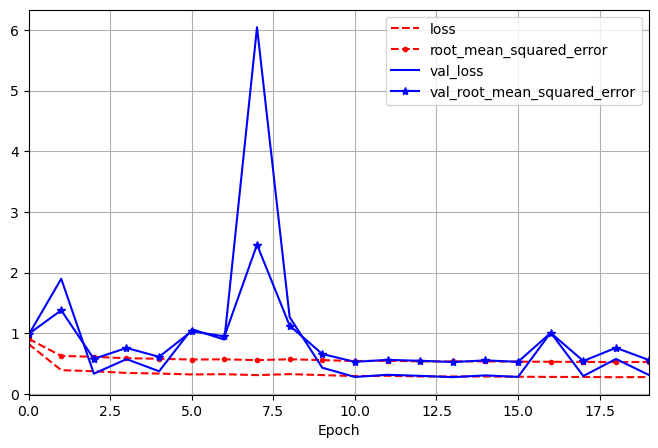

In [378]:
# Plots the learning curve

pd.DataFrame(history.history).plot(
    figsize=(8,5), grid=True, style=["r--", "r--.", "b-", "b-*"], xlabel="Epoch", xlim=[0, 19])
plt.show()


In [380]:
# Now, metric RMSE is used to measure the model performance on test data
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.2861 - root_mean_squared_error: 0.5349


[0.28613370656967163, 0.5349146723747253]

### Callbacks & TensorBoard

In [52]:
# Creates checkpoint to save best weights against model performance on validation 
# dataset while training

save_weights_callback = tf.keras.callbacks.ModelCheckpoint(
    "save_weights_callback", save_best_only=True)

In [6]:
# Stops training when it measures no progress on the validation set for a specified number of epochs
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    patience=5, restore_best_weights=True)

In [20]:
def get_run_logdir(logdir="logs"):
    """
    Returns directory path to store all logs into. For convenience, log files for each training-run 
    gets stored in a folder named as timestamp. By default, it considers the root log folder name
    as "logs". For otherwise, that needs to be passed in the parameter.
    """
    return Path(logdir) / strftime("%Y_%m_%d_%H_%M_%S")


In [34]:
# Gets the log path for current training run
run_logdir = get_run_logdir()

# Sets callback for TensorBoard especially to visualize learning curves
tensorboard_callback = tf.keras.callbacks.TensorBoard(run_logdir)

Now, continue with the housing dataset with the same model used in the previous experiment but with callbacks this time.

In [48]:
# Resets all the keras states
tf.keras.backend.clear_session()

# Random seed for TensorFlow is set to reproduce the following model
tf.random.set_seed(42)

# Creates an empty model
model = tf.keras.Sequential()

# All layers are added to the model sequentially

model.add(tf.keras.layers.Normalization())
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(1))

2024-08-19 09:23:53.944259: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [50]:
# Compiles the model with specified loss function, optimizer and oen or more metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
    loss="mse", 
    metrics=["RootMeanSquaredError"])

In [54]:
# Normalization layer must be fitted to the training data before the model is fitted
model.layers[0].adapt(X_train)

# Trains and evalutes the model
history = model.fit(
    X_train, y_train, 
    epochs=100,    # set to a large value to auto-stop training when there is no progress 
    validation_data=(X_val, y_val), 
    callbacks=[save_weights_callback, early_stopping_callback, tensorboard_callback])

Epoch 1/100
363/363 [==============================] - ETA: 0s - loss: 0.9036 - root_mean_squared_error: 0.9506

INFO:tensorflow:Assets written to: save_weights_callback/assets


INFO:tensorflow:Assets written to: save_weights_callback/assets


363/363 [==============================] - 3s 7ms/step - loss: 0.9036 - root_mean_squared_error: 0.9506 - val_loss: 0.4150 - val_root_mean_squared_error: 0.6442
Epoch 2/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3717 - root_mean_squared_error: 0.6097 - val_loss: 0.7792 - val_root_mean_squared_error: 0.8827
Epoch 3/100
363/363 [==============================] - ETA: 0s - loss: 0.3515 - root_mean_squared_error: 0.5929

INFO:tensorflow:Assets written to: save_weights_callback/assets


INFO:tensorflow:Assets written to: save_weights_callback/assets


363/363 [==============================] - 3s 7ms/step - loss: 0.3515 - root_mean_squared_error: 0.5929 - val_loss: 0.3461 - val_root_mean_squared_error: 0.5883
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3420 - root_mean_squared_error: 0.5848 - val_loss: 0.9717 - val_root_mean_squared_error: 0.9857
Epoch 5/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3277 - root_mean_squared_error: 0.5725 - val_loss: 0.5438 - val_root_mean_squared_error: 0.7374
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3210 - root_mean_squared_error: 0.5666 - val_loss: 1.7632 - val_root_mean_squared_error: 1.3278
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3277 - root_mean_squared_error: 0.5725 - val_loss: 0.6731 - val_root_mean_squared_error: 0.8205
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3087 - root_mean_squared_error: 0.5556 - val_loss: 2.0012 - val_root_m

INFO:tensorflow:Assets written to: save_weights_callback/assets


INFO:tensorflow:Assets written to: save_weights_callback/assets


363/363 [==============================] - 2s 6ms/step - loss: 0.2897 - root_mean_squared_error: 0.5382 - val_loss: 0.3434 - val_root_mean_squared_error: 0.5860
Epoch 12/100
363/363 [==============================] - 1s 3ms/step - loss: 0.2935 - root_mean_squared_error: 0.5418 - val_loss: 0.6415 - val_root_mean_squared_error: 0.8010
Epoch 13/100
355/363 [============================>.] - ETA: 0s - loss: 0.2820 - root_mean_squared_error: 0.5310

INFO:tensorflow:Assets written to: save_weights_callback/assets


INFO:tensorflow:Assets written to: save_weights_callback/assets


363/363 [==============================] - 2s 4ms/step - loss: 0.2817 - root_mean_squared_error: 0.5307 - val_loss: 0.2815 - val_root_mean_squared_error: 0.5306
Epoch 14/100
363/363 [==============================] - 1s 4ms/step - loss: 0.2778 - root_mean_squared_error: 0.5271 - val_loss: 0.5325 - val_root_mean_squared_error: 0.7297
Epoch 15/100
363/363 [==============================] - 1s 3ms/step - loss: 0.2788 - root_mean_squared_error: 0.5280 - val_loss: 0.3269 - val_root_mean_squared_error: 0.5717
Epoch 16/100
363/363 [==============================] - 1s 4ms/step - loss: 0.2744 - root_mean_squared_error: 0.5238 - val_loss: 0.4235 - val_root_mean_squared_error: 0.6507
Epoch 17/100
363/363 [==============================] - ETA: 0s - loss: 0.2718 - root_mean_squared_error: 0.5213

INFO:tensorflow:Assets written to: save_weights_callback/assets


INFO:tensorflow:Assets written to: save_weights_callback/assets


363/363 [==============================] - 2s 6ms/step - loss: 0.2718 - root_mean_squared_error: 0.5213 - val_loss: 0.2803 - val_root_mean_squared_error: 0.5294
Epoch 18/100
363/363 [==============================] - 1s 3ms/step - loss: 0.2664 - root_mean_squared_error: 0.5161 - val_loss: 0.4709 - val_root_mean_squared_error: 0.6862
Epoch 19/100
363/363 [==============================] - 1s 4ms/step - loss: 0.2675 - root_mean_squared_error: 0.5172 - val_loss: 0.3717 - val_root_mean_squared_error: 0.6097
Epoch 20/100
363/363 [==============================] - 1s 3ms/step - loss: 0.2684 - root_mean_squared_error: 0.5181 - val_loss: 0.4596 - val_root_mean_squared_error: 0.6779
Epoch 21/100
363/363 [==============================] - 1s 3ms/step - loss: 0.2623 - root_mean_squared_error: 0.5121 - val_loss: 0.3249 - val_root_mean_squared_error: 0.5700
Epoch 22/100
348/363 [===========================>..] - ETA: 0s - loss: 0.2550 - root_mean_squared_error: 0.5049

INFO:tensorflow:Assets written to: save_weights_callback/assets


INFO:tensorflow:Assets written to: save_weights_callback/assets


363/363 [==============================] - 2s 4ms/step - loss: 0.2579 - root_mean_squared_error: 0.5078 - val_loss: 0.2695 - val_root_mean_squared_error: 0.5191
Epoch 23/100
363/363 [==============================] - 1s 3ms/step - loss: 0.2549 - root_mean_squared_error: 0.5049 - val_loss: 0.2814 - val_root_mean_squared_error: 0.5305
Epoch 24/100
363/363 [==============================] - 1s 3ms/step - loss: 0.2557 - root_mean_squared_error: 0.5057 - val_loss: 0.2920 - val_root_mean_squared_error: 0.5403
Epoch 25/100
363/363 [==============================] - 1s 3ms/step - loss: 0.2536 - root_mean_squared_error: 0.5036 - val_loss: 0.3012 - val_root_mean_squared_error: 0.5488
Epoch 26/100
363/363 [==============================] - 1s 4ms/step - loss: 0.2520 - root_mean_squared_error: 0.5020 - val_loss: 0.2704 - val_root_mean_squared_error: 0.5200
Epoch 27/100
356/363 [============================>.] - ETA: 0s - loss: 0.2480 - root_mean_squared_error: 0.4980

INFO:tensorflow:Assets written to: save_weights_callback/assets


INFO:tensorflow:Assets written to: save_weights_callback/assets


363/363 [==============================] - 2s 4ms/step - loss: 0.2486 - root_mean_squared_error: 0.4986 - val_loss: 0.2691 - val_root_mean_squared_error: 0.5187
Epoch 28/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2500 - root_mean_squared_error: 0.5000 - val_loss: 0.4507 - val_root_mean_squared_error: 0.6714
Epoch 29/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2469 - root_mean_squared_error: 0.4969 - val_loss: 0.4855 - val_root_mean_squared_error: 0.6968
Epoch 30/100
363/363 [==============================] - 1s 3ms/step - loss: 0.2468 - root_mean_squared_error: 0.4968 - val_loss: 0.3271 - val_root_mean_squared_error: 0.5719
Epoch 31/100
347/363 [===========================>..] - ETA: 0s - loss: 0.2490 - root_mean_squared_error: 0.4990

INFO:tensorflow:Assets written to: save_weights_callback/assets


INFO:tensorflow:Assets written to: save_weights_callback/assets


363/363 [==============================] - 1s 4ms/step - loss: 0.2482 - root_mean_squared_error: 0.4982 - val_loss: 0.2586 - val_root_mean_squared_error: 0.5085
Epoch 32/100
363/363 [==============================] - 1s 3ms/step - loss: 0.2441 - root_mean_squared_error: 0.4940 - val_loss: 0.3775 - val_root_mean_squared_error: 0.6144
Epoch 33/100
363/363 [==============================] - 1s 3ms/step - loss: 0.2411 - root_mean_squared_error: 0.4911 - val_loss: 0.2789 - val_root_mean_squared_error: 0.5281
Epoch 34/100
363/363 [==============================] - 1s 4ms/step - loss: 0.2376 - root_mean_squared_error: 0.4874 - val_loss: 0.3101 - val_root_mean_squared_error: 0.5569
Epoch 35/100
363/363 [==============================] - 1s 3ms/step - loss: 0.2400 - root_mean_squared_error: 0.4899 - val_loss: 0.2902 - val_root_mean_squared_error: 0.5387
Epoch 36/100
363/363 [==============================] - 1s 3ms/step - loss: 0.2478 - root_mean_squared_error: 0.4978 - val_loss: 0.2646 - val_r

INFO:tensorflow:Assets written to: save_weights_callback/assets


INFO:tensorflow:Assets written to: save_weights_callback/assets


363/363 [==============================] - 2s 5ms/step - loss: 0.2342 - root_mean_squared_error: 0.4839 - val_loss: 0.2543 - val_root_mean_squared_error: 0.5043
Epoch 40/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2311 - root_mean_squared_error: 0.4807 - val_loss: 0.2764 - val_root_mean_squared_error: 0.5257
Epoch 41/100
363/363 [==============================] - 1s 3ms/step - loss: 0.2315 - root_mean_squared_error: 0.4811 - val_loss: 0.2560 - val_root_mean_squared_error: 0.5060
Epoch 42/100
363/363 [==============================] - 1s 3ms/step - loss: 0.2290 - root_mean_squared_error: 0.4786 - val_loss: 0.2937 - val_root_mean_squared_error: 0.5420
Epoch 43/100
363/363 [==============================] - 1s 3ms/step - loss: 0.2304 - root_mean_squared_error: 0.4800 - val_loss: 0.3020 - val_root_mean_squared_error: 0.5496
Epoch 44/100
363/363 [==============================] - 1s 3ms/step - loss: 0.2305 - root_mean_squared_error: 0.4801 - val_loss: 0.2728 - val_r

In [56]:
# After early stopping for the training, let's measure the model performance on test data
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.2660 - root_mean_squared_error: 0.5158


[0.26600080728530884, 0.5157526731491089]